# TITLE:  LSTM for Stock Market Analysis.

### SUMMARY: In the problem, we have to predict the stock market variations using Machine Learning 

### algorithm and judge which algorithm suits Stock Market kind of dataset. In this analysis, we have used a 

### single dataset from Kaggle: "Huge Stock Market Dataset". For comparison, we have implemented Linear 

### Regression and Long Short Term Memory(LSTM) Algorithms.

## Linear Regression Workout

In [1]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

In [2]:
#Reading the dataset from Kaggle : Huge stock market dataset

df=pd.read_csv("a.us.txt",sep=',')

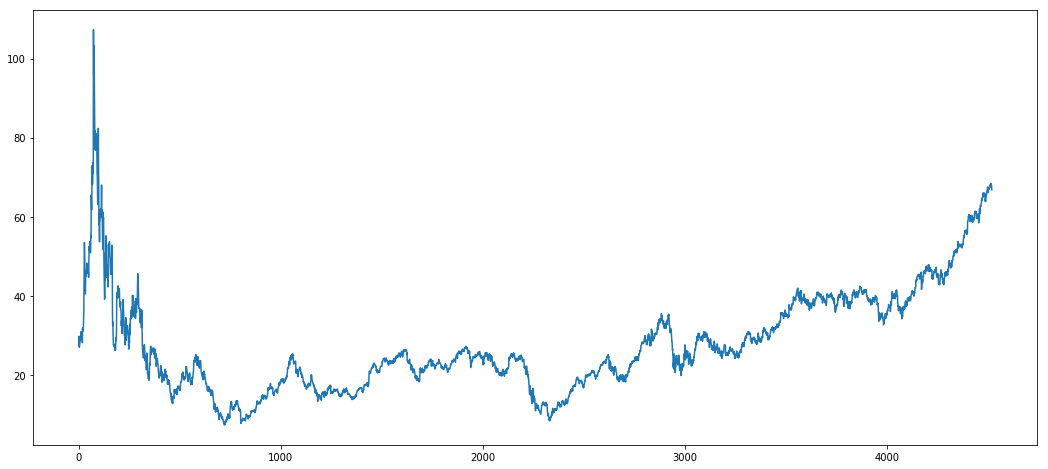

In [3]:
#plot

rcParams['figure.figsize'] = 20,10
plt.figure(figsize=(18,8))
plt.plot(df['Close'], label='Close Price history')

In [4]:
#Sorting the Dataset

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [5]:
#splitting into train and validation

train = new_data[:2260]
valid = new_data[2260:]

In [ ]:
new_data.shape, train.shape, valid.shape

In [ ]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

In [7]:
#make predictions

preds = []
for i in range(0,2261):
    a = train['Close'][len(train)-2261+i:].sum() + sum(preds)
    b = a/2261
    preds.append(b)

In [8]:
#calculating rmse

rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

17.508515551027024

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


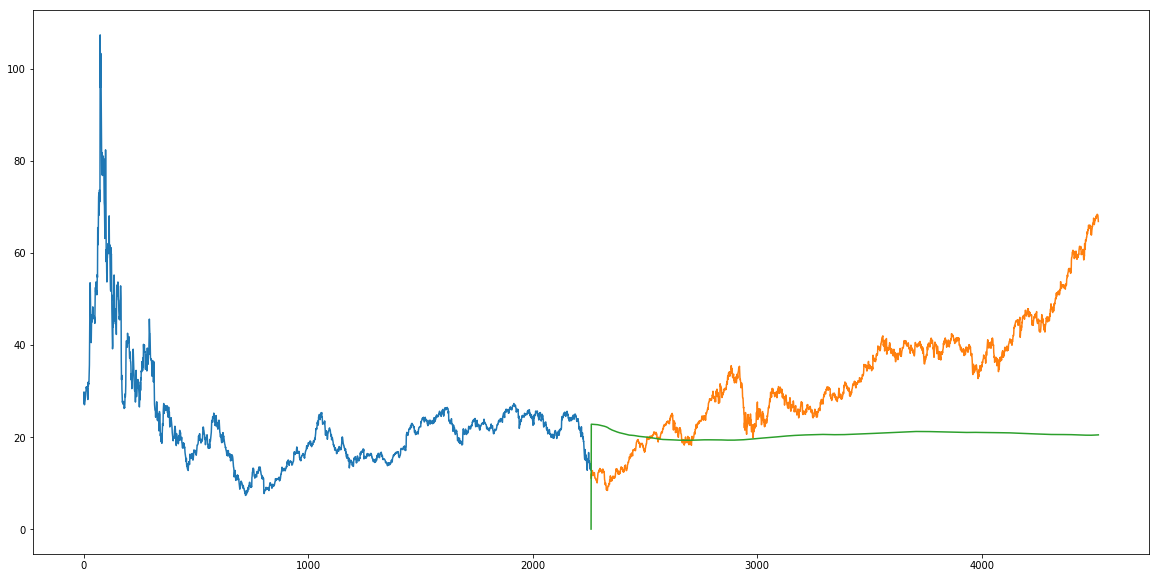

In [9]:
#plot

valid['Predictions'] = 0
valid['Predictions'] = preds
rcParams['figure.figsize'] = 20,10
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

### CONCLUSION: From the above plot, we can say that Linear Regression fails to give appropriate predictions on Stock market data. One can say that the model overfits because it overlooks the value of 'Close' from the previous iteration rather it focuses the same date of month for next values.

## LSTM Workout

## Reading the dataset from Kaggle : Huge stock market dataset

In [10]:
df=pd.read_csv("a.us.txt",sep=',')

In [11]:
#importing required packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [12]:
#adding a new 'Date' column

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4521 entries, 1999-11-18 to 2017-11-10
Data columns (total 7 columns):
Date       4521 non-null datetime64[ns]
Open       4521 non-null float64
High       4521 non-null float64
Low        4521 non-null float64
Close      4521 non-null float64
Volume     4521 non-null int64
OpenInt    4521 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 282.6 KB


In [14]:
#Sorting the dataset

df.sort_index(ascending=True,inplace=True)
df.drop(labels='OpenInt',axis=1,inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
1999-11-18,1999-11-18,30.713,33.754,27.002,29.702,66277506
1999-11-19,1999-11-19,28.986,29.027,26.872,27.257,16142920
1999-11-22,1999-11-22,27.886,29.702,27.044,29.702,6970266
1999-11-23,1999-11-23,28.688,29.446,27.002,27.002,6332082
1999-11-24,1999-11-24,27.083,28.309,27.002,27.717,5132147


In [15]:
#giving date as index

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

# Actual Plot of Stock dataset

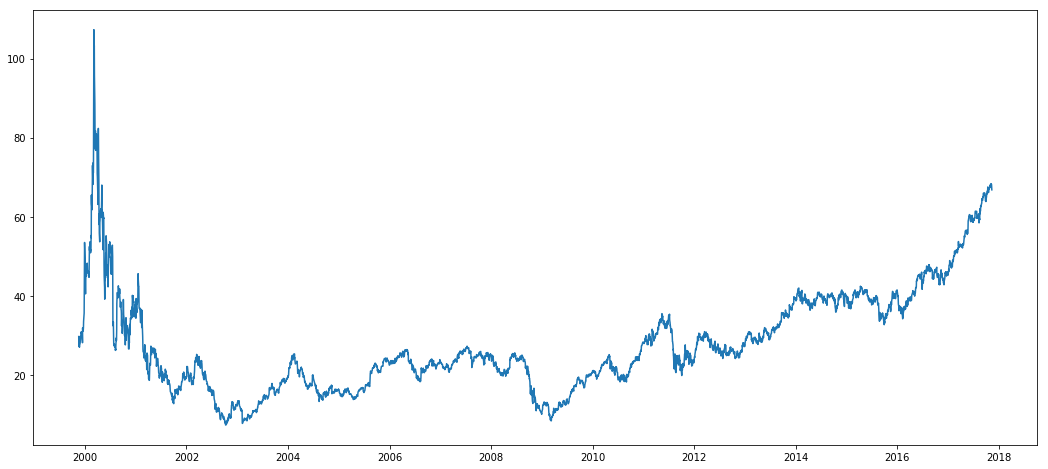

In [16]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20,10

#normalizing the data

plt.figure(figsize=(18,8))
plt.plot(df['Close'], label='Close Price history')

In [17]:
#making a new dataframe

new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(df)):
    new_data['Date'][i]=df['Date'][i]
    new_data['Close'][i]=df['Close'][i]

new_data.index=new_data['Date']
new_data.drop('Date',axis=1,inplace=True)   #droping the column 'Date'
dataset=new_data.values

In [18]:
dataset

array([[29.701999999999998],
       [27.256999999999998],
       [29.701999999999998],
       ...,
       [68.11],
       [67.47],
       [66.81]], dtype=object)

In [19]:
#splitting into train and validation

train=dataset[:2260]
valid=dataset[2261:]

In [20]:
#scaling the features

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
#taking data for training

x_train, y_train = [], []
for i in range(50,len(train)):
    x_train.append(scaled_data[i-50:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [22]:
#preparing the model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')  #using 'adam' optimization
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


inputs = new_data[len(new_data) - len(valid) - 50:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(50,inputs.shape[0]):
    X_test.append(inputs[i-50:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
 - 374s - loss: 0.0013


In [23]:
#calculating rmse

rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

1.2684592191237198

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


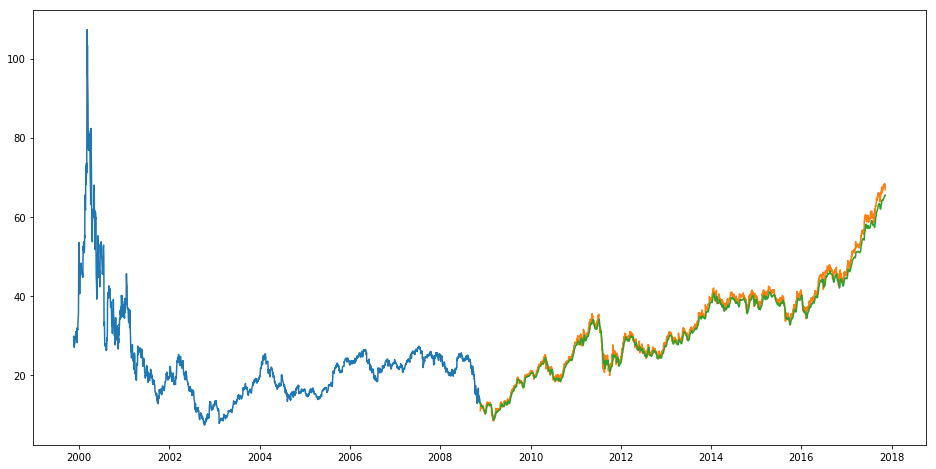

In [24]:
#plotting using the prediction

train = new_data[:2260]
valid = new_data[2261:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

### CONCLUSION: Far better results are acquired using LSTM. Although factors such as demonetization etc can affect out Stock Market Predictions. 



### Model Used:

#### Sequential

### Layers Used:

#### 1) LSTM : LSTMs are widely used for sequence prediction problems, it is able to store past information that is important,                                 and forget the information that is not.
#### 2) Dense : Dense implements the operation:                                                                                                                                                                      output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as                                the activation argument, kernel is a weights matrixcreated by the layer, and bias is a bias vector created by the                   layer

#### 3)MinMaxScaler : Transforms features by scaling each feature to a given range. This estimator scales and                                        translates each feature individually such that it is in the given range on the training set

### PROJECT DONE BY :- 
###                                        1) Rajdeep Suhas Jadhav
###                                        2) Shounak Dey

###                                          Thank You